# 🚀 Houston, we have liftoff! 🛰️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eu = pd.read_csv(r"C:\Users\datan\OneDrive\Desktop\Capstone\Exoplanets\data\everything_exoplanet_eu.csv")

In [3]:
eu.head(4)

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.743,0.289,0.289,6.383,0.078,0.078,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.00,80.00000,80.00000,NaN,NaN,HD 10697
1,109 Tau b,Candidate,16.000,NaN,NaN,16.000,NaN,NaN,NaN,NaN,...,G8III,0.60,0.05,0.05,5012.07,3.91874,3.91874,NaN,NaN,"n Tau, HD 34559"
2,110 Vir b,Candidate,1.600,0.100,0.100,NaN,NaN,NaN,NaN,NaN,...,K0IIIb,3.33,1.90,1.90,4650.00,NaN,NaN,NaN,NaN,HIP 73620
3,112 Psc b,Confirmed,0.033,0.005,0.005,0.033,0.005,0.005,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.00,105.43700,105.43700,NaN,NaN,HD 12235


# Cleaning 🧹

In [8]:
eu.isnull().sum()

name                       0
planet_status              0
mass                    4727
mass_error_min          5742
mass_error_max          5742
                        ... 
star_teff_error_min     2384
star_teff_error_max     2384
star_detected_disc      9665
star_magnetic_field     9829
star_alternate_names    3437
Length: 98, dtype: int64

In [10]:
eu.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [12]:
# removing any unnecessary columns for my analysis

eu.drop(['mass_error_min', 'mass_error_max',
        'mass_sini', 'mass_sini_error_min', 
        'mass_sini_error_max', 'radius_error_min', 
        'radius_error_max', 'orbital_period_error_min', 
        'orbital_period_error_max', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impact_parameter_error_max', 'tzero_vr',
       'tzero_vr_error_min', 'tzero_vr_error_max', 'k', 'k_error_min',
       'k_error_max', 'temp_calculated', 'temp_calculated_error_min',
       'temp_calculated_error_max', 'temp_measured', 'hot_point_lon',
       'geometric_albedo', 'geometric_albedo_error_min',
       'geometric_albedo_error_max', 'log_g', 'publication', 'mass_measurement_type',
        'radius_measurement_type', 'alternate_names',
       'molecules', 'star_name', 'ra', 'dec', 'mag_v', 'mag_i', 'mag_j',
       'mag_h', 'mag_k', 'star_distance_error_min',
       'star_distance_error_max', 'star_metallicity',
       'star_metallicity_error_min', 'star_metallicity_error_max', 'star_mass_error_min', 
        'star_mass_error_max', 'star_radius_error_min', 'star_radius_error_max', 
        'star_age', 'star_age_error_min', 'star_age_error_max', 'star_teff',
       'star_teff_error_min', 'star_teff_error_max', 'star_detected_disc',
       'star_magnetic_field', 'star_alternate_names'], axis=1, inplace=True)

In [14]:
eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9838 non-null   object 
 1   planet_status    9838 non-null   object 
 2   mass             5111 non-null   float64
 3   radius           6659 non-null   float64
 4   orbital_period   8241 non-null   float64
 5   semi_major_axis  7102 non-null   float64
 6   eccentricity     3452 non-null   float64
 7   inclination      4066 non-null   float64
 8   discovered       9813 non-null   float64
 9   detection_type   9838 non-null   object 
 10  star_distance    7851 non-null   float64
 11  star_mass        8284 non-null   float64
 12  star_radius      7700 non-null   float64
 13  star_sp_type     4116 non-null   object 
dtypes: float64(10), object(4)
memory usage: 1.1+ MB


In [16]:
eu.isnull().sum()

name                  0
planet_status         0
mass               4727
radius             3179
orbital_period     1597
semi_major_axis    2736
eccentricity       6386
inclination        5772
discovered           25
detection_type        0
star_distance      1987
star_mass          1554
star_radius        2138
star_sp_type       5722
dtype: int64

In [18]:
# replacing all nulls with zero

eu.fillna(0, inplace=True)

In [20]:
eu.isnull().sum()

name               0
planet_status      0
mass               0
radius             0
orbital_period     0
semi_major_axis    0
eccentricity       0
inclination        0
discovered         0
detection_type     0
star_distance      0
star_mass          0
star_radius        0
star_sp_type       0
dtype: int64

In [22]:
# cleaning the star_sp_type column

In [24]:
eu['star_sp_type'].value_counts()

star_sp_type
0         5722
G8V        123
G5V        120
K0V        117
G3V        113
          ... 
B9V+?        1
B6           1
G0VI         1
K1Ve         1
DA+M6V       1
Name: count, Length: 570, dtype: int64

In [26]:
# fill NaN values with an empty string and changing the data type to string
eu['star_sp_type'] = eu['star_sp_type'].fillna('')
eu['star_sp_type'] = eu['star_sp_type'].astype(str)

# defining the function to extract the first letter of the star type
def simplify_star_type(star_sp_type):
    return star_sp_type[0] if star_sp_type else 'Unknown'

eu['star_type'] = eu['star_sp_type'].apply(simplify_star_type)

In [28]:
eu['star_type'].value_counts()

star_type
0    5722
G    1445
K     996
M     785
F     496
P     104
D      80
A      72
s      43
B      36
L      20
W      20
C       6
O       3
d       3
T       2
X       2
S       1
        1
N       1
Name: count, dtype: int64

In [30]:
desired_star_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M'] # Morgan-Keenan system simplified

eu = eu[eu['star_type'].isin(desired_star_types)]

In [32]:
eu['star_type'].value_counts()

star_type
G    1445
K     996
M     785
F     496
A      72
B      36
O       3
Name: count, dtype: int64

In [34]:
eu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3833 entries, 0 to 9827
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3833 non-null   object 
 1   planet_status    3833 non-null   object 
 2   mass             3833 non-null   float64
 3   radius           3833 non-null   float64
 4   orbital_period   3833 non-null   float64
 5   semi_major_axis  3833 non-null   float64
 6   eccentricity     3833 non-null   float64
 7   inclination      3833 non-null   float64
 8   discovered       3833 non-null   float64
 9   detection_type   3833 non-null   object 
 10  star_distance    3833 non-null   float64
 11  star_mass        3833 non-null   float64
 12  star_radius      3833 non-null   float64
 13  star_sp_type     3833 non-null   object 
 14  star_type        3833 non-null   object 
dtypes: float64(10), object(5)
memory usage: 479.1+ KB


In [36]:
# Fixing the detection_type column to focus on the most effective ones
main_types = ['Radial Velocity', 'Microlensing', 'Primary Transit', 'Imaging', 'Astrometry']

# making the function to keep only the main detection types and remmove everything after the first comma
def filter_main_types(detection_type):
    for main_type in main_types:
        if main_type in detection_type:
            return main_type
    return 'Other'

eu['detection_type_filtered'] = eu['detection_type'].apply(lambda x: x.split(',')[0].strip())
eu['detection_type_final'] = eu['detection_type_filtered'].apply(filter_main_types)

print(eu[['detection_type', 'detection_type_final']])

                   detection_type detection_type_final
0     Radial Velocity, Astrometry      Radial Velocity
1                 Radial Velocity      Radial Velocity
2                 Radial Velocity      Radial Velocity
3                 Radial Velocity      Radial Velocity
4     Radial Velocity, Astrometry      Radial Velocity
...                           ...                  ...
9822              Radial Velocity      Radial Velocity
9823              Radial Velocity      Radial Velocity
9825                      Imaging              Imaging
9826              Radial Velocity      Radial Velocity
9827             Kinematic, Other                Other

[3833 rows x 2 columns]


In [38]:
eu['detection_type_final'].value_counts() # need to plot everything but 'other'

detection_type_final
Primary Transit    1865
Radial Velocity    1348
Imaging             346
Other               190
Astrometry           58
Microlensing         26
Name: count, dtype: int64

In [40]:
# removing rows with 'Other' in the detection_type column
eu = eu[eu['detection_type_final'] != 'Other']

In [42]:
eu['detection_type_final'].value_counts() # need to plot everything but 'other'

detection_type_final
Primary Transit    1865
Radial Velocity    1348
Imaging             346
Astrometry           58
Microlensing         26
Name: count, dtype: int64

In [44]:
# removing any unnecessary columns

eu.drop(['star_sp_type', 'detection_type', 'detection_type_filtered'], axis=1, inplace=True)

In [46]:
# fixing my year column

In [48]:
eu['discovered'].value_counts().head()

discovered
2017.0    543
2016.0    300
2022.0    299
2014.0    226
2019.0    210
Name: count, dtype: int64

In [50]:
eu['discovered'] = eu['discovered'].apply(lambda x: int(x))

In [52]:
eu['discovered'].dtype

dtype('int64')

In [54]:
eu['discovered'].value_counts()

discovered
2017    543
2016    300
2022    299
2014    226
2019    210
2018    206
2024    188
2021    183
2011    175
2020    144
2010    141
2015    139
2013    128
2023    127
2012    105
2009     90
2007     80
2008     65
2002     45
2004     43
2005     41
2006     39
2003     31
2000     22
2001     20
1999     19
1996     10
1998      9
0         7
1995      2
1991      2
1997      2
1988      1
1989      1
Name: count, dtype: int64

In [56]:
# removing the yeear 2025 and 0
eu = eu[(eu['discovered'] != 2025) & (eu['discovered'] != 0)]

# coming back and removing every year before the year 2000
eu = eu[eu['discovered'] >= 2000]

In [58]:
eu['discovered'].value_counts()

discovered
2017    543
2016    300
2022    299
2014    226
2019    210
2018    206
2024    188
2021    183
2011    175
2020    144
2010    141
2015    139
2013    128
2023    127
2012    105
2009     90
2007     80
2008     65
2002     45
2004     43
2005     41
2006     39
2003     31
2000     22
2001     20
Name: count, dtype: int64

In [60]:
# renaming columns

eu = eu.rename(columns= {'name':'planet_name', 'mass':'planet_mass', 'radius':'planet_radius', 'detection_type_final':'detection_type', 'discovered':'year'})

In [62]:
eu.head(4) # now I have something to work with! woo hoo!

,planet_name,planet_status,planet_mass,planet_radius,orbital_period,semi_major_axis,eccentricity,inclination,year,star_distance,star_mass,star_radius,star_type,detection_type
0,109 Psc b,Confirmed,5.743,1.152,1075.4,2.051,0.104,86.116,2000,32.5600,1.13,1.790,G,Radial Velocity
1,109 Tau b,Candidate,16.000,0.000,26.0,0.232,0.000,0.000,2005,71.0625,2.47,9.800,G,Radial Velocity
2,110 Vir b,Candidate,1.600,0.000,507.0,1.370,0.300,0.000,2004,58.8085,1.30,13.400,K,Radial Velocity
3,112 Psc b,Confirmed,0.033,0.000,4.4,0.054,0.376,0.000,2022,31.7627,1.10,1.801,G,Radial Velocity


In [64]:
# Saaving the DataFrame to a CSV file to use in PowerBI
# eu.to_csv('pandasClean_exoplanetEU.csv', index=False)

# Adding Columns 🏛️

In [67]:
# Classifying exoplanets into categories based on their characteristics, such as: terrestrial planets, gas giants, and super-earths

In [69]:
conditions = [
    (eu['planet_mass'] < 0.1),
    (eu['planet_mass'] >= 0.1) & (eu['planet_mass'] < 0.5),
    (eu['planet_mass'] >= 0.5)
]
choices = ['Terrestrial', 'Super-Earth', 'Gas Giant']
eu['planet_type'] = np.select(conditions, choices, default='Unknown')

In [71]:
eu.head(4)

,planet_name,planet_status,planet_mass,planet_radius,orbital_period,semi_major_axis,eccentricity,inclination,year,star_distance,star_mass,star_radius,star_type,detection_type,planet_type
0,109 Psc b,Confirmed,5.743,1.152,1075.4,2.051,0.104,86.116,2000,32.5600,1.13,1.790,G,Radial Velocity,Gas Giant
1,109 Tau b,Candidate,16.000,0.000,26.0,0.232,0.000,0.000,2005,71.0625,2.47,9.800,G,Radial Velocity,Gas Giant
2,110 Vir b,Candidate,1.600,0.000,507.0,1.370,0.300,0.000,2004,58.8085,1.30,13.400,K,Radial Velocity,Gas Giant
3,112 Psc b,Confirmed,0.033,0.000,4.4,0.054,0.376,0.000,2022,31.7627,1.10,1.801,G,Radial Velocity,Terrestrial


In [74]:
# This categorizes exoplanets into 'Low Inclination', 'Medium Inclination', and 'High Inclination' based on their orbital inclinations.

In [76]:
conditions_inclination = [
    (eu['inclination'] < 10),
    (eu['inclination'] >= 10) & (eu['inclination'] < 30),
    (eu['inclination'] >= 30)
]
choices_inclination = ['Low Inclination', 'Medium Inclination', 'High Inclination']
eu['inclination_category'] = np.select(conditions_inclination, choices_inclination, default='Unknown')

In [78]:
# Proportion of exoplanets in each inclination category

In [80]:
eu.head(4)

,planet_name,planet_status,planet_mass,planet_radius,orbital_period,semi_major_axis,eccentricity,inclination,year,star_distance,star_mass,star_radius,star_type,detection_type,planet_type,inclination_category
0,109 Psc b,Confirmed,5.743,1.152,1075.4,2.051,0.104,86.116,2000,32.5600,1.13,1.790,G,Radial Velocity,Gas Giant,High Inclination
1,109 Tau b,Candidate,16.000,0.000,26.0,0.232,0.000,0.000,2005,71.0625,2.47,9.800,G,Radial Velocity,Gas Giant,Low Inclination
2,110 Vir b,Candidate,1.600,0.000,507.0,1.370,0.300,0.000,2004,58.8085,1.30,13.400,K,Radial Velocity,Gas Giant,Low Inclination
3,112 Psc b,Confirmed,0.033,0.000,4.4,0.054,0.376,0.000,2022,31.7627,1.10,1.801,G,Radial Velocity,Terrestrial,Low Inclination


In [82]:
inclination_distribution = eu['inclination_category'].value_counts(normalize=True) * 100
print(inclination_distribution)

inclination_category
Low Inclination       51.894150
High Inclination      46.935933
Medium Inclination     1.169916
Name: proportion, dtype: float64


In [85]:
# Now attempting to calculate the habitable zone for each star

In [87]:
def habitable_zone(star_luminosity):
    inner_bound = 0.75 * (star_luminosity ** 0.5)
    outer_bound = 1.75 * (star_luminosity ** 0.5)
    return inner_bound, outer_bound

# this is assuming star_luminosity is related to star_mass... I will double check this if I use this.
eu['star_luminosity'] = eu['star_mass'] ** 3.5
eu['hz_inner'], eu['hz_outer'] = zip(*eu['star_luminosity'].apply(habitable_zone))

# exoplanets in the habitable zone
eu['in_habitable_zone'] = (eu['semi_major_axis'] >= eu['hz_inner']) & (eu['semi_major_axis'] <= eu['hz_outer'])
habitable_exoplanets = eu[eu['in_habitable_zone']]
print(habitable_exoplanets[['planet_name', 'semi_major_axis', 'star_type']])

                  planet_name  semi_major_axis star_type
0                   109 Psc b          2.05100         G
2                   110 Vir b          1.37000         K
36                   24 Sex c          2.08000         G
37                  27 Hya Ab          5.90000         K
143   2MASS J05373850+2428517          0.00000         M
...                       ...              ...       ...
9618                WASP-57 b          0.00000         G
9783              Wolf 1061 c          0.08900         M
9785              Wolf 1069 b          0.06720         M
9821                 YZ Cet c          0.02156         M
9822                 YZ Cet d          0.02851         M

[338 rows x 3 columns]


In [89]:
eu.head(4)

,planet_name,planet_status,planet_mass,planet_radius,orbital_period,semi_major_axis,eccentricity,inclination,year,star_distance,star_mass,star_radius,star_type,detection_type,planet_type,inclination_category,star_luminosity,hz_inner,hz_outer,in_habitable_zone
0,109 Psc b,Confirmed,5.743,1.152,1075.4,2.051,0.104,86.116,2000,32.5600,1.13,1.790,G,Radial Velocity,Gas Giant,High Inclination,1.533821,0.928856,2.167331,True
1,109 Tau b,Candidate,16.000,0.000,26.0,0.232,0.000,0.000,2005,71.0625,2.47,9.800,G,Radial Velocity,Gas Giant,Low Inclination,23.683143,3.649900,8.516433,False
2,110 Vir b,Candidate,1.600,0.000,507.0,1.370,0.300,0.000,2004,58.8085,1.30,13.400,K,Radial Velocity,Gas Giant,Low Inclination,2.504965,1.187031,2.769739,True
3,112 Psc b,Confirmed,0.033,0.000,4.4,0.054,0.376,0.000,2022,31.7627,1.10,1.801,G,Radial Velocity,Terrestrial,Low Inclination,1.395965,0.886132,2.067642,False


In [91]:
# Saaving the DataFrame to a CSV file to use in PowerBI
# eu.to_csv('pandasClean_exoplanetEU_02.csv', index=False)

# Outer Worlds: Analyzing the Discovery and Characteristics of Exoplanets

Working the Data Questions 👨🏻‍🚀 

# #1. What are some of the most common detection methods and their effectiveness?

detection_type
Primary Transit    1862
Radial Velocity    1309
Imaging             337
Astrometry           57
Microlensing         25
Name: count, dtype: int64


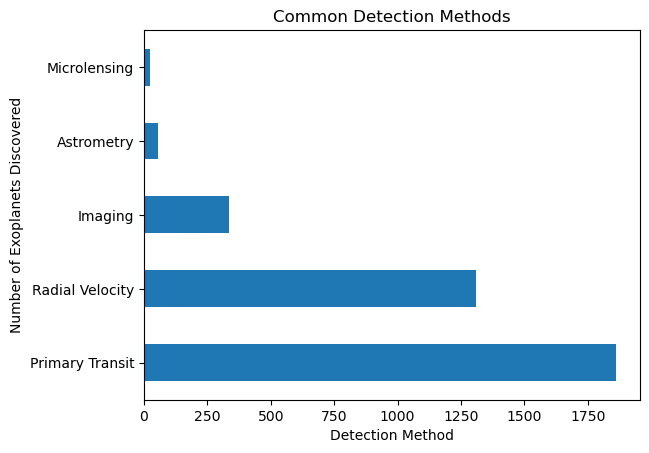

In [96]:
detection_counts = eu['detection_type'].value_counts()
print(detection_counts)

detection_counts.plot(kind='barh')
plt.xlabel('Detection Method')
plt.ylabel('Number of Exoplanets Discovered')
plt.title('Common Detection Methods');

How have the methods for detecting exoplanets evolved over time?

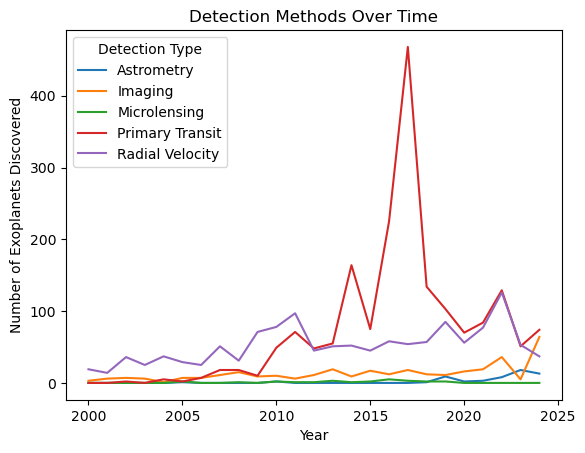

In [99]:
detection_method_trend = eu.groupby(['year', 'detection_type']).size().unstack().fillna(0)
detection_method_trend.plot(kind='line', stacked=False)
plt.xlabel('Year')
plt.ylabel('Number of Exoplanets Discovered')
plt.title('Detection Methods Over Time')
plt.legend(title='Detection Type');

Success of Detection Methods

In [107]:
# Grouping by detection method and calculate mean characteristics
detection_method_stats = eu.groupby('detection_type').agg({'planet_mass': 'mean', 'planet_radius': 'mean'})
print(detection_method_stats)

                 planet_mass  planet_radius
detection_type                             
Astrometry         29.943181       0.000000
Imaging            31.354833       0.357395
Microlensing       12.471847       0.000000
Primary Transit     1.202304       0.509852
Radial Velocity     8.555458       0.053379


# #2. What are the most common types of exoplanets discovered so far?

planet_type
Terrestrial    1715
Gas Giant      1598
Super-Earth     277
Name: count, dtype: int64
Total number of detected planets
3590


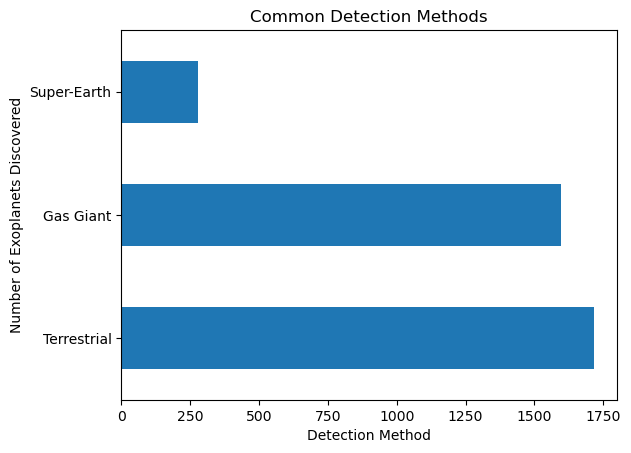

In [208]:
detection_counts = eu['planet_type'].value_counts()
print(detection_counts)

total_detections = eu['planet_type'].value_counts().sum()
print('Total number of detected planets')
print(total_detections)

detection_counts.plot(kind='barh')
plt.xlabel('Detection Method')
plt.ylabel('Number of Exoplanets Discovered')
plt.title('Common Detection Methods');

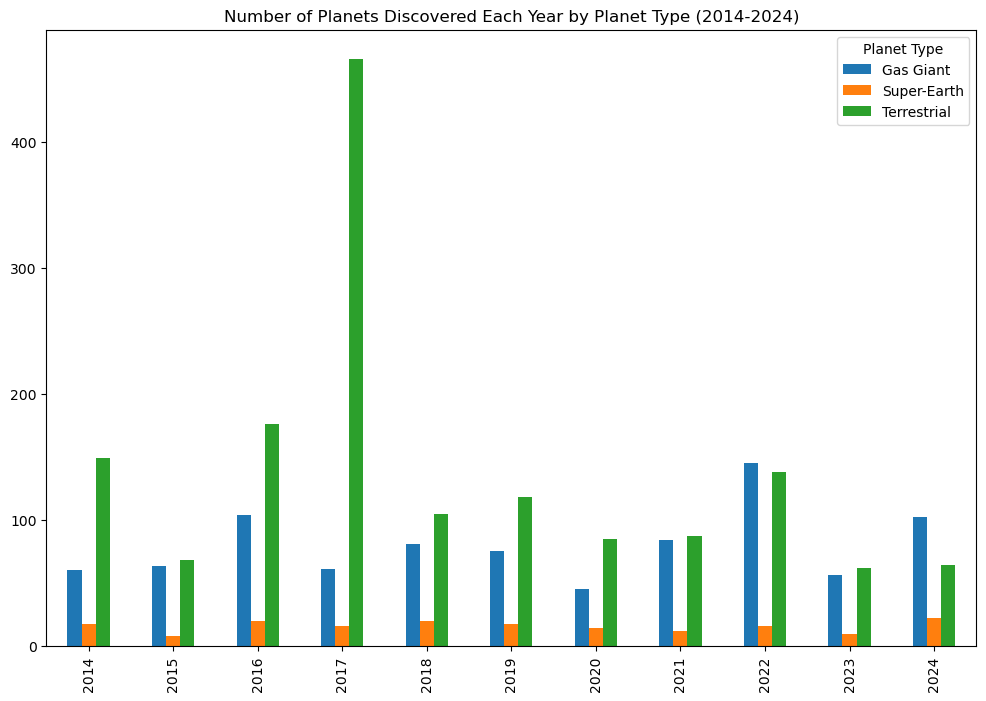

In [192]:
eu_filtered = eu[(eu['year'] >= 2014) & (eu['year'] <= 2024)]

planet_discovery_counts = eu_filtered.groupby(['year', 'planet_type']).size().unstack().fillna(0)

planet_discovery_counts.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Planets Discovered Each Year by Planet Type (2014-2024)')
plt.legend(title='Planet Type');

What is the range of orbital periods and semi-major axes of exoplanets?

In [113]:
orbital_period_summary = eu['orbital_period'].describe()
semi_major_axis_summary = eu['semi_major_axis'].describe()

print('Orbital Period Summary:')
print(orbital_period_summary)
print('\nSemi-Major Axis Summary:')
print(semi_major_axis_summary)

Orbital Period Summary:
count    3.590000e+03
mean     1.241190e+04
std      3.070920e+05
min      0.000000e+00
25%      3.416908e+00
50%      1.123240e+01
75%      1.441200e+02
max      1.281150e+07
Name: orbital_period, dtype: float64

Semi-Major Axis Summary:
count     3590.000000
mean       166.257367
std       1383.617082
min          0.000000
25%          0.048000
50%          0.120000
75%          1.330000
max      38000.000000
Name: semi_major_axis, dtype: float64


# #3. Work In Progress

🧐

# #4. What are the most common types of stars hosting exoplanets?

star_type
G    1368
K     939
M     740
F     455
A      55
B      32
O       1
Name: count, dtype: int64


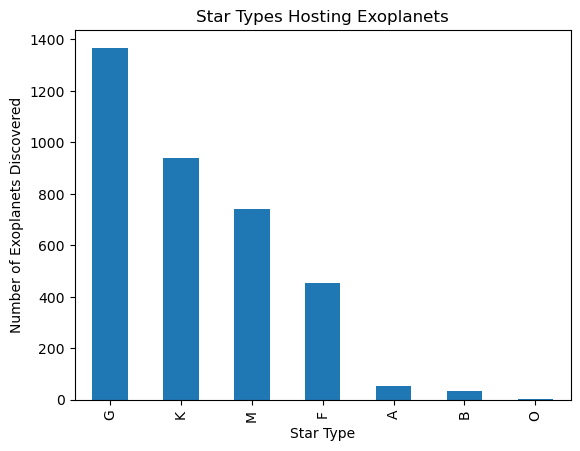

In [161]:
star_type_counts = eu['star_type'].value_counts()
print(star_type_counts)

star_type_counts = eu['star_type'].value_counts()
star_type_counts.plot(kind='bar')
plt.xlabel('Star Type')
plt.ylabel('Number of Exoplanets Discovered')
plt.title('Star Types Hosting Exoplanets');

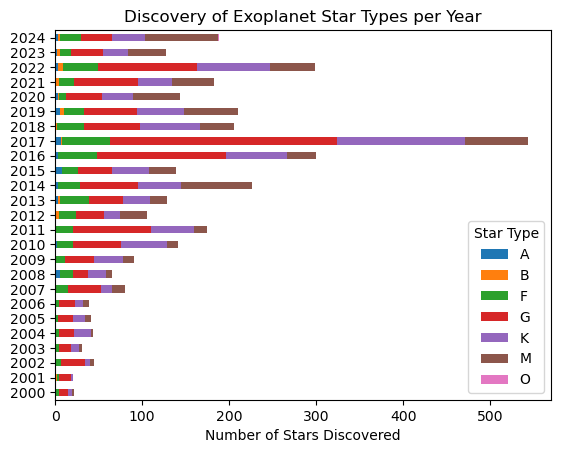

In [132]:
type_discoveries = eu.groupby(['year', 'star_type']).size().unstack().fillna(0)
type_discoveries.plot(kind='barh', stacked=True)
plt.xlabel('Number of Stars Discovered')
plt.ylabel('')
plt.title('Discovery of Exoplanet Star Types per Year')
plt.legend(title='Star Type');

In [130]:
# Summary statistics for star characteristics
star_mass_summary = eu['star_mass'].describe()
star_radius_summary = eu['star_radius'].describe()
star_luminosity_summary = eu['star_luminosity'].describe()

print('Star Mass Summary:')
print(star_mass_summary)
print('\nStar Radius Summary:')
print(star_radius_summary)
print('\nStar Luminosity Summary:')
print(star_luminosity_summary)

Star Mass Summary:
count    3590.000000
mean        0.943316
std         0.774577
min         0.000000
25%         0.670000
50%         0.932400
75%         1.120000
max        23.470000
Name: star_mass, dtype: float64

Star Radius Summary:
count    3590.000000
mean        1.900965
std         5.694001
min         0.000000
25%         0.550000
50%         0.898000
75%         1.301500
max        91.400000
Name: star_radius, dtype: float64

Star Luminosity Summary:
count     3590.000000
mean        31.305072
std       1113.442727
min          0.000000
25%          0.246185
50%          0.782723
75%          1.486836
max      62631.932729
Name: star_luminosity, dtype: float64


# Habitable Zone Workings 🌎

in_habitable_zone
False    3252
True      338
Name: count, dtype: int64


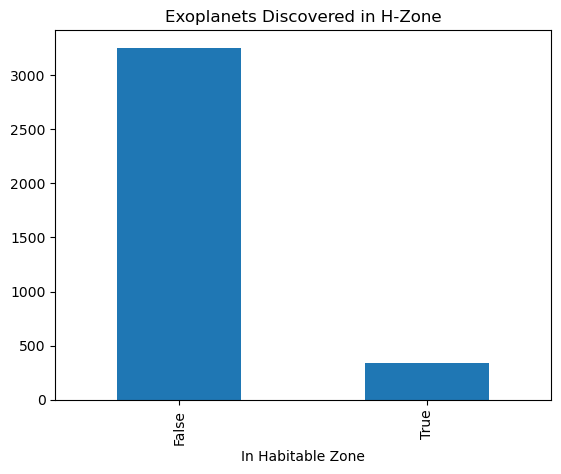

In [163]:
in_habitable_zone_counts = eu['in_habitable_zone'].value_counts()
print(in_habitable_zone_counts)

star_type_counts = eu['in_habitable_zone'].value_counts()
star_type_counts.plot(kind='bar')
plt.xlabel('In Habitable Zone')
plt.ylabel('')
plt.title('Exoplanets Discovered in H-Zone');

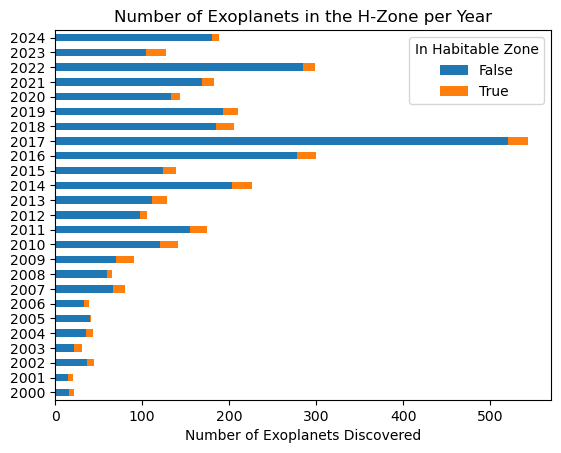

In [157]:
type_discoveries = eu.groupby(['year', 'in_habitable_zone']).size().unstack().fillna(0)
type_discoveries.plot(kind='barh', stacked=True)
plt.ylabel('')
plt.xlabel('Number of Exoplanets Discovered')
plt.title('Number of Exoplanets in the H-Zone per Year')
plt.legend(title='In Habitable Zone');

# Bringing in Our Solar System 👽

In [141]:
sol = pd.read_csv(r"C:\Users\datan\OneDrive\Desktop\Capstone\Exoplanets\data\solar_system_nasa_scrape_github.csv")

In [143]:
sol.head(9)

,planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,...,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field,has_liquid_water
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,47.4,7.0,0.205,0.034,167,0,0,No,Yes,No
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,35.0,3.4,0.007,177.400,464,92,0,No,No,No
2,Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,29.8,0.0,0.017,23.400,15,1,1,No,Yes,Yes
3,Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,24.1,1.9,0.094,25.200,-65,0.01,2,No,No,No
4,Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes,No
5,Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes,No
6,Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes,No
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,...,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes,No
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown,No


In [145]:
sol.columns

Index(['planet', 'mass', 'diameter', 'density', 'gravity', 'escape_velocity',
       'rotation_period', 'length_of_day', 'distance_from_sun', 'perihelion',
       'aphelion', 'orbital_period', 'orbital_velocity', 'orbital_inclination',
       'orbital_eccentricity', 'obliquity_to_orbit', 'mean_temperature',
       'surface_pressure', 'number_of_moons', 'has_ring_system',
       'has_global_magnetic_field', 'has_liquid_water'],
      dtype='object')